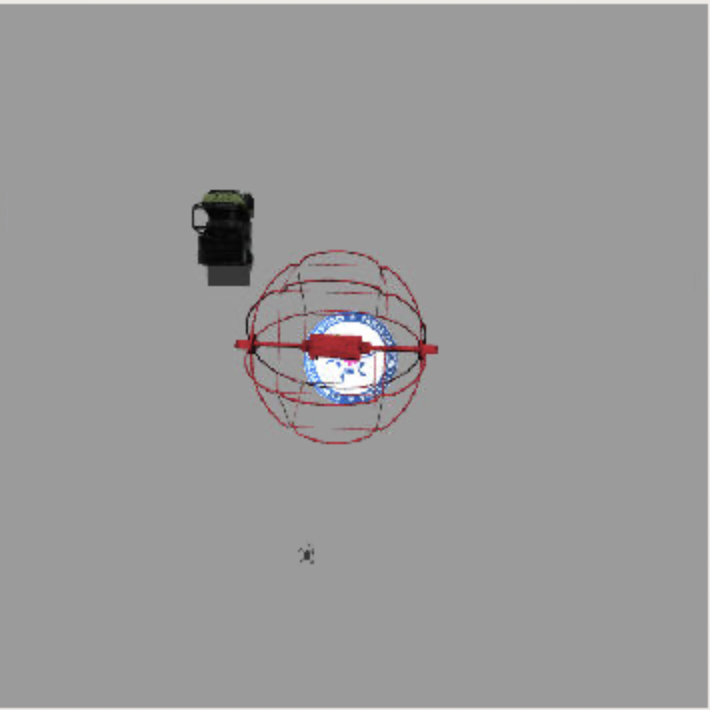

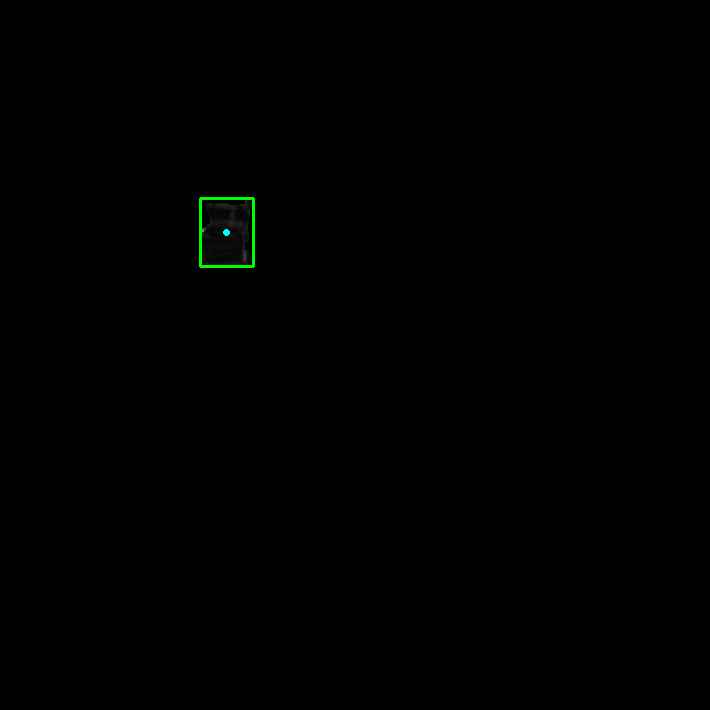

In [ ]:
import cv2
import numpy as np


from google.colab.patches import cv2_imshow


# Reading the image
img = cv2.imread('/bin/polaris.png')
# Showing the output
cv2_imshow(img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# lower bound and upper bound for Green color
lower_bound = np.array([0, 0, 0])   
upper_bound = np.array([180, 255, 30])
# find the colors within the boundaries
mask = cv2.inRange(hsv, lower_bound, upper_bound)


kernel = np.ones((7,7),np.uint8)
# Remove unnecessary noise from mask
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)



# Segment only the detected region
segmented_img = cv2.bitwise_and(img, img, mask=mask)


# Find contours from the mask
contours, hierarchy = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# output = cv2.drawContours(segmented_img, contours, -1, (0, 0, 255), 3)

c = max(contours, key = cv2.contourArea)
x,y,w,h = cv2.boundingRect(c)

# draw the biggest contour (c) in green
cv2.rectangle(segmented_img,(x,y),(x+w,y+h),(0,255,0),2)
# cv2.line(output, (x+w//2, y), (x+w//2, y+h), (0, 0, 255), 2)
# below circle to denote mid point of center line
center = (x+w//2, y+h//2)
radius = 2
cv2.circle(segmented_img, center, radius, (255, 255, 0), 2)

# Showing the output
cv2_imshow(segmented_img)